<a href="https://colab.research.google.com/github/piyushh15/DS_agriculture/blob/main/agriculture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import io

df = pd.read_csv("/content/crop_production.csv")
df.head(5)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [ ]:
state_abbreviations = {
    'Andaman and Nicobar Islands': 'ANI','Andhra Pradesh': 'AP','Arunachal Pradesh': 'ARP',
    'Assam': 'ASM','Bihar': 'BHR','Chandigarh': 'CHD','Chhattisgarh': 'CHG','Dadra and Nagar Haveli': 'DNH',
    'Goa': 'GOA','Gujarat': 'GUJ','Haryana': 'HAR','Himachal Pradesh': 'HP','Jammu and Kashmir ': 'J&K',
    'Jharkhand': 'JHK','Karnataka': 'KAR','Kerala': 'KER','Madhya Pradesh': 'MP','Maharashtra': 'MAH',
    'Manipur': 'MAN','Meghalaya': 'MEG','Mizoram': 'MIZ','Nagaland': 'NAG','Odisha': 'ODI',
    'Puducherry': 'PUD','Punjab': 'PUN','Rajasthan': 'RAJ','Sikkim': 'SIK','Tamil Nadu': 'TN',
    'Telangana ': 'TEL','Tripura': 'TRI','Uttar Pradesh': 'UP','Uttarakhand': 'UK','West Bengal': 'WB'
}
df['State_Name'] = df['State_Name'].replace(state_abbreviations)

In [ ]:
states = list(df['State_Name'].unique())
print(len(states))
print(states)

33
['ANI', 'AP', 'ARP', 'ASM', 'BHR', 'CHD', 'CHG', 'DNH', 'GOA', 'GUJ', 'HAR', 'HP', 'J&K', 'JHK', 'KAR', 'KER', 'MP', 'MAH', 'MAN', 'MEG', 'MIZ', 'NAG', 'ODI', 'PUD', 'PUN', 'RAJ', 'SIK', 'TN', 'TEL', 'TRI', 'UP', 'UK', 'WB']


# **Some states are missing - why?**
**Delhi:**

Urbanization: Delhi is a highly urbanized city-state with minimal agricultural activities. Its economy is predominantly service-based with a focus on commerce, finance, and government services.

**Lakshadweep:**

Geography: Lakshadweep is an archipelago with very limited land area suitable for agriculture. The islands are known more for their marine resources and tourism rather than agriculture.

**Ladakh:**

Climate and Terrain: Ladakh has an extremely harsh climate and rugged terrain, making large-scale agriculture challenging. The region has limited agricultural activities due to its high altitude and arid conditions



In [ ]:
seasons = list(df['Season'].unique())
seasons

['Kharif     ',
 'Whole Year ',
 'Autumn     ',
 'Rabi       ',
 'Summer     ',
 'Winter     ']

### We have 16 years of data

In [ ]:
years = list(df['Crop_Year'].unique())
print(years)

[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2010, 1997, 1998, 1999, 2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015]


There are 124 different crops in dataset

Major Crop Categories: As mentioned earlier, there are several major categories like food grains, pulses, oilseeds, fruits, vegetables, spices, and plantation crops. Each category itself holds a substantial number of crops.

Regional Variations: While some crops are widespread, many are specific to certain regions due to climate or soil conditions. Accounting for these variations adds to the total number.

Varietal Differences: Within many crops, there can be numerous varieties with slight differences. Including these variations increases the overall count


### **There is possibilty that production of crops which have MSP is high**
Kharif Crops (14):
Paddy Jowar (Sorghum) Bajra (Pearl millet) Tur (Arhar) Moong (Green gram) Urad (Black gram) Groundnut Cotton Soyabean Sunflower seed Sesamum Nigerseed Hempseed Kuttu (Buckwheat)

Rabi Crops (6):
Wheat Barley Gram (Chickpea) Masur (Lentil) Rapeseed & Mustard Safflower Other Commercial Crops (2):

Sugarcane
Copra (dried coconut kernel)

In [ ]:
crop = list(df['Crop'].unique())
print(len(crop))
print(crop)

124
['Arecanut', 'Other Kharif pulses', 'Rice', 'Banana', 'Cashewnut', 'Coconut ', 'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca', 'Black pepper', 'Dry chillies', 'other oilseeds', 'Turmeric', 'Maize', 'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Groundnut', 'Sunflower', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Horse-gram', 'Jowar', 'Korra', 'Ragi', 'Tobacco', 'Gram', 'Wheat', 'Masoor', 'Sesamum', 'Linseed', 'Safflower', 'Onion', 'other misc. pulses', 'Samai', 'Small millets', 'Coriander', 'Potato', 'Other  Rabi pulses', 'Soyabean', 'Beans & Mutter(Vegetable)', 'Bhindi', 'Brinjal', 'Citrus Fruit', 'Cucumber', 'Grapes', 'Mango', 'Orange', 'other fibres', 'Other Fresh Fruits', 'Other Vegetables', 'Papaya', 'Pome Fruit', 'Tomato', 'Rapeseed &Mustard', 'Mesta', 'Cowpea(Lobia)', 'Lemon', 'Pome Granet', 'Sapota', 'Cabbage', 'Peas  (vegetable)', 'Niger seed', 'Bottle Gourd', 'Sannhamp', 'Varagu', 'Garlic', 'Ginger', 'Oilseeds total', 'Pulses total', 'Jute', 'Peas & beans (Pulses)', 'Black

Area and production units are not mentioned anywhere so we can not do comparison between the crops

In [ ]:
df['Area'].max()

8580100.0

In [ ]:
df['Area'].min()

0.04

In [ ]:
df.Area.value_counts()

## kharif and Rabi are important seasons

In [ ]:
distinct_crops_in_season_list = []
for x in seasons:
    distinct_crops_in_season_list.append(len(df[df['Season']==x]['Crop'].unique()))

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='Distinct Crops', x=seasons, y=distinct_crops_in_season_list)
])


fig.update_layout(
    title='Number of Distinct Crops in Each Season',
    xaxis_title='Season',
    yaxis_title='Number of Distinct Crops',
    barmode='group'
)


fig.show()

<ipython-input-21-4dd2b5e8c30e>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




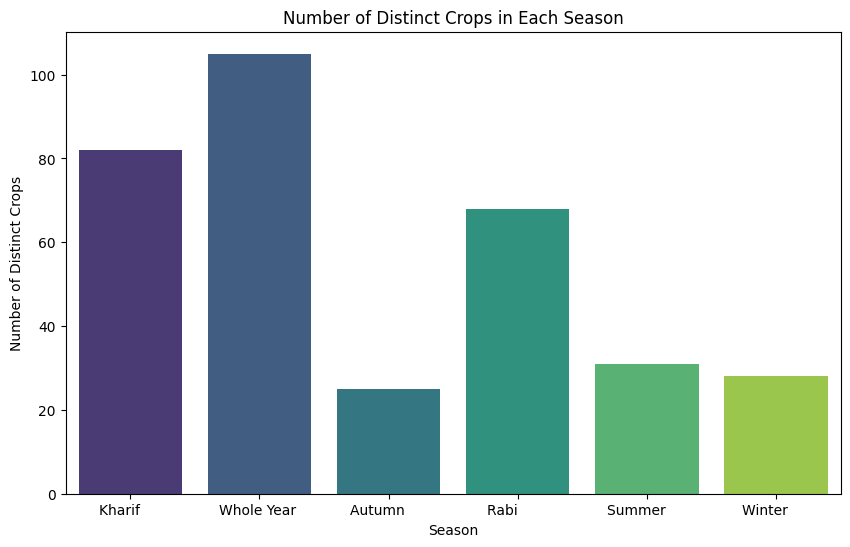

In [ ]:
# just doing this because i want to submit this some where and they want graphs in seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
data = pd.DataFrame({
    'Season': seasons,
    'Distinct Crops': distinct_crops_in_season_list
})

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='Distinct Crops', data=data, palette='viridis')
# Add titles and labels
plt.title('Number of Distinct Crops in Each Season')
plt.xlabel('Season')
plt.ylabel('Number of Distinct Crops')

# Show the plot
plt.show()

now let analyse crop wise data

there are 124 crops mentioned in data set
rice is a crop that grow in every state
fact found on google - Almost all parts of India are suitable for raising rice during the summer season provided that water is available.

In [ ]:
# lets figure out which crop grows in most of the states
df[df['Crop'] == 'Wheat']['State_Name'].unique()

array(['AP', 'ARP', 'ASM', 'BHR', 'CHD', 'CHG', 'DNH', 'GUJ', 'HAR', 'HP',
       'J&K', 'JHK', 'KAR', 'KER', 'MP', 'MAH', 'MEG', 'MIZ', 'NAG',
       'ODI', 'PUN', 'RAJ', 'SIK', 'TN', 'TEL', 'TRI', 'UP', 'UK', 'WB'],
      dtype=object)

In [ ]:
total_states_for_each_crop = []
for x in crop:
    total_states_for_each_crop.append(len(df[df['Crop'] == x]['State_Name'].unique()))


<ipython-input-11-ec544a8b9917>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Crop', y='Total States', data=top_10_data, palette='viridis')


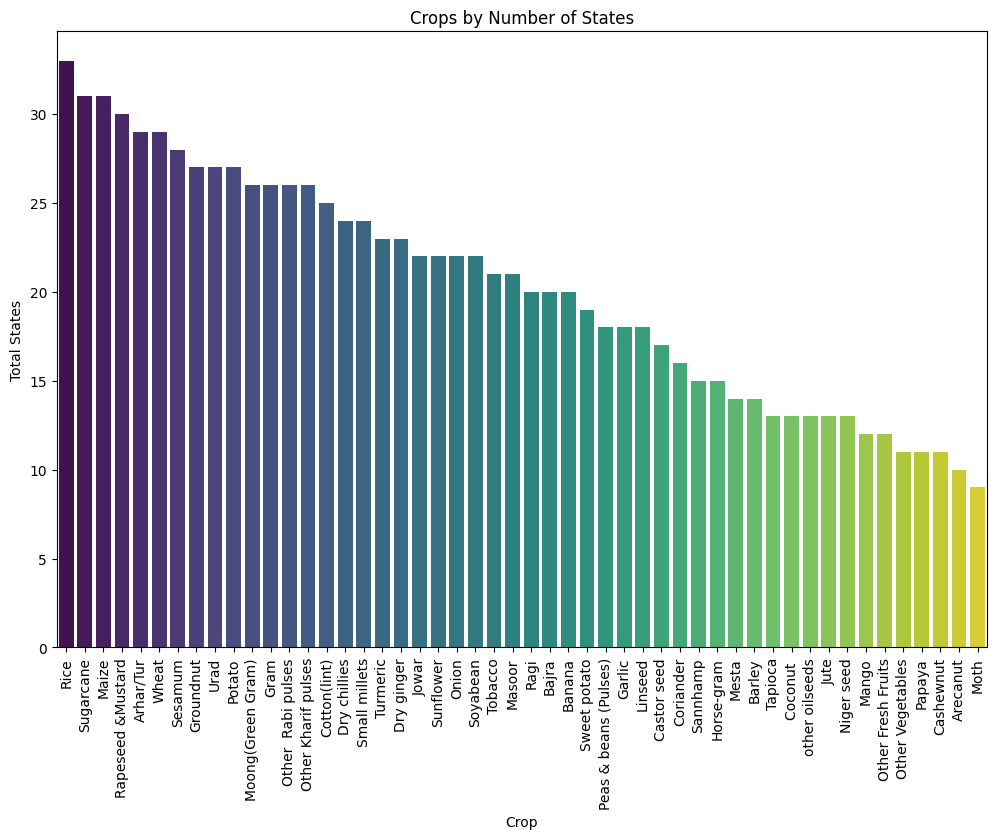

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


crop = df['Crop'].unique()
total_states_for_each_crop = [len(df[df['Crop'] == x]['State_Name'].unique()) for x in crop]

data = pd.DataFrame({
    'Crop': crop,
    'Total States': total_states_for_each_crop
})

top_10_data = data.sort_values(by='Total States', ascending=False).head(50)
plt.figure(figsize=(12, 8))
sns.barplot(x='Crop', y='Total States', data=top_10_data, palette='viridis')


plt.title('Crops by Number of States')
plt.xlabel('Crop')
plt.ylabel('Total States')
plt.xticks(rotation = 90)

plt.show()

In [ ]:
import plotly.graph_objects as go
import pandas as pd

crop = df['Crop'].unique()
total_states_for_each_crop = [len(df[df['Crop'] == x]['State_Name'].unique()) for x in crop]


data = pd.DataFrame({
    'Crop': crop,
    'Total States': total_states_for_each_crop
})


top_data = data.sort_values(by='Total States', ascending=False)

fig = go.Figure(data=[
    go.Bar(
        name='Total States',
        x=top_data['Crop'],
        y=top_data['Total States'],
        marker=dict(
            color=top_data['Total States'],
            colorscale='Viridis',
            showscale=True
        )
    )
])

fig.update_layout(
    title='Top 10 Crops by Number of States',
    xaxis_title='Crop',
    yaxis_title='Total States',
    barmode='group',
    width=1500,
    height=400,
    xaxis=dict(
        tickangle=90,
        tickfont=dict(size=5)
    )
)

fig.show()


## Crop-Specific Insights:

**Rice:**

States like West Bengal (WB), Uttar Pradesh (UP), and Punjab (PUN) show consistently high production. There is a noticeable variation in production levels among states across the years, but these states remain prominent producer

**Sugarcane:**

Maharashtra (MAH) and Uttar Pradesh (UP) are leading producers. The production levels in these states are significantly higher compared to others, with UP showing particularly high production in multiple years.

Maize:

Karnataka (KAR), Madhya Pradesh (MP), and Andhra Pradesh (AP) show high production. The production seems relatively stable with some fluctuations across the years. Groundnut:

Gujarat (GUJ) stands out as a major producer. Other states like Andhra Pradesh (AP) and Tamil Nadu (TN) also contribute significantly but to a lesser extent.

Wheat:

Uttar Pradesh (UP) and Punjab (PUN) dominate wheat production. Haryana (HAR) also shows substantial production levels.

Cotton:

Gujarat (GUJ), Maharashtra (MAH), and Andhra Pradesh (AP) are leading producers. There is a noticeable increase in production in some years, indicating possible improvements in agricultural practices or favorable climatic conditions.

Turmeric:

Andhra Pradesh (AP) is a prominent producer. Production in states like Tamil Nadu (TN) is also significant.

## **State-Specific Insights:**

Uttar Pradesh (UP):
High production of Sugarcane, Wheat, and Rice. Consistently one of the top producers for these crops.

Maharashtra (MAH):
Leading in Sugarcane and Cotton production. Shows significant production in other crops like Jowar and Turmeric.

Gujarat (GUJ):
Major producer of Groundnut and Cotton. Shows substantial production in several other crops.

In [ ]:
# which state is mass producer of which product

crops_to_be_analysed = list(top_data[:20]['Crop'].values)
print(crops_to_be_analysed)

['Rice', 'Sugarcane', 'Maize', 'Rapeseed &Mustard', 'Arhar/Tur', 'Wheat', 'Sesamum', 'Groundnut', 'Urad', 'Potato', 'Moong(Green Gram)', 'Gram', 'Other  Rabi pulses', 'Other Kharif pulses', 'Cotton(lint)', 'Dry chillies', 'Small millets', 'Turmeric', 'Dry ginger', 'Jowar']


In [ ]:
years_to_be_analysed = years[-5:-1]
years_to_be_analysed

[2011, 2012, 2013, 2014]

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=len(crops_to_be_analysed), cols=len(years_to_be_analysed),
    subplot_titles=[f'{crop} - {year}' for crop in crops_to_be_analysed for year in years_to_be_analysed],
    shared_yaxes=True
)

for i, crop in enumerate(crops_to_be_analysed):
    for j, year in enumerate(years_to_be_analysed):
        state_pro_dict = {}

        for state in states:
            subset = df[(df['Crop'] == crop) & (df['Crop_Year'] == year) & (df['State_Name'] == state)]
            production_sum = subset['Production'].sum()
            state_pro_dict[state] = production_sum

            sorted_states = sorted(state_pro_dict, key=lambda k: state_pro_dict[k], reverse=True)
            sorted_pro = [state_pro_dict[state] for state in sorted_states]

            fig.add_trace(go.Bar(x=sorted_states, y=sorted_pro, name=f'{crop} - {year}'), row=i+1, col=j+1)

# Calculate appropriate height: 500 pixels per row
fig_height = 300 * len(crops_to_be_analysed)
fig.update_layout(title='Production Analysis by Crop and Year', height=fig_height, width=1000, showlegend=False)

for i in range(len(crops_to_be_analysed)):
    for j in range(len(years_to_be_analysed)):
        fig.update_xaxes(row=i+1, col=j+1, tickangle=90)
fig.update_yaxes(title_text='Production', row=1, col=1)

fig.show()